In [1]:
import numpy as np
import pandas as pd

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [23]:
df = pd.read_csv("C:/projects/py-adult-data-analysis/data/adult.csv")
df = df.replace("?", pd.NA)
df = df.dropna()
df.head(25)

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
5,5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K,44
6,6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K,49
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
8,8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K,330
9,9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K,303


# Task 1
Print the count of men and women in the dataset.

In [11]:
gender_counts = df["sex"].value_counts()
print(gender_counts)

Male      20380
Female     9782
Name: sex, dtype: int64


# Task 2
Find the average age of men in dataset

In [15]:
men = df[df["sex"] == "Male"]
average_age_men = men["age"].mean()
print("The average age of men in the dataset is:", round(average_age_men, 2))

The average age of men in the dataset is: 39.18


# Task 3
Get the percentage of people from Poland (native-country)

In [17]:
native_country_counts = df["native-country"].value_counts()
poland_count = native_country_counts["Poland"]
percentage_poland = (poland_count / len(df)) * 100
print("The percentage of people from Poland is:", round(percentage_poland, 2), "%")

The percentage of people from Poland is: 0.19 %


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [21]:
rich_age_mean = df[df["salary"] == ">50K"]["age"].mean()
rich_age_std = df[df["salary"] == ">50K"]["age"].std()
print("Mean age of people who earn > 50K per year:", round(rich_age_mean, 2))
print("Standard deviation of age of people who earn > 50K per year:", round(rich_age_std, 2))

Mean age of people who earn > 50K per year: 43.96
Standard deviation of age of people who earn > 50K per year: 10.27
Mean age of people who earn <= 50K per year: 36.61
Standard deviation of age of people who earn <= 50K per year: 13.46


In [ ]:
poor_age_mean = df[df["salary"] == "<=50K"]["age"].mean()
poor_age_std = df[df["salary"] == "<=50K"]["age"].std()

print("Mean age of people who earn <= 50K per year:", round(poor_age_mean, 2))
print("Standard deviation of age of people who earn <= 50K per year:", round(poor_age_std, 2))

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [24]:
high_earners = df[df["salary"] == ">50K"]
no_high_edu = high_earners[~high_earners["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"])]
if no_high_edu.empty:
    print("There are no people without higher education who earn over 50K")
else:
    print("There are people without higher education who earn over 50K")

There are people without higher education who earn over 50K


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [25]:
print(df.groupby("education")["age"].describe())

               count       mean        std   min   25%   50%   75%   max
education                                                               
10th           820.0  37.897561  16.225795  17.0  23.0  36.0  52.0  90.0
11th          1048.0  32.363550  15.089307  17.0  18.0  28.5  43.0  90.0
12th           377.0  32.013263  14.373710  17.0  19.0  28.0  41.0  79.0
1st-4th        151.0  44.622517  14.929051  19.0  33.0  44.0  56.0  81.0
5th-6th        288.0  41.649306  14.754622  17.0  28.0  41.0  53.0  82.0
7th-8th        557.0  47.631957  15.737479  17.0  34.0  49.0  60.0  90.0
9th            455.0  40.303297  15.335754  17.0  28.0  38.0  53.0  90.0
Assoc-acdm    1008.0  37.286706  10.509755  19.0  29.0  36.0  44.0  90.0
Assoc-voc     1307.0  38.246366  11.181253  19.0  30.0  37.0  45.0  84.0
Bachelors     5044.0  38.641554  11.577566  19.0  29.0  37.0  46.0  90.0
Doctorate      375.0  47.130667  11.471727  24.0  39.0  47.0  54.0  80.0
HS-grad       9840.0  38.640955  13.067730  17.0  2

# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [31]:
df["marriedStatus"] = df["marital-status"].str.contains("Married").map({True: "married", False: "non-married"})
df[df["sex"] == "Male"].groupby("marriedStatus").describe()["salary K$"]

,count,mean,std,min,25%,50%,75%,max
marriedStatus,,,,,,,,
married,12775.0,107.494560,102.475154,15.0,30.0,46.0,184.0,349.0
non-married,7605.0,46.597239,54.397981,15.0,24.0,34.0,43.0,349.0


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [27]:
max_hours_per_week = df["hours-per-week"].max()
print("Max hours per week:", max_hours_per_week)
num_people_max_hours = df[df["hours-per-week"] == max_hours_per_week]["hours-per-week"].value_counts()
print("Number of people working max hours per week:", num_people_max_hours)


Max hours per week: 99
Number of people working max hours per week: 99    78
Name: hours-per-week, dtype: int64


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

<Axes: >

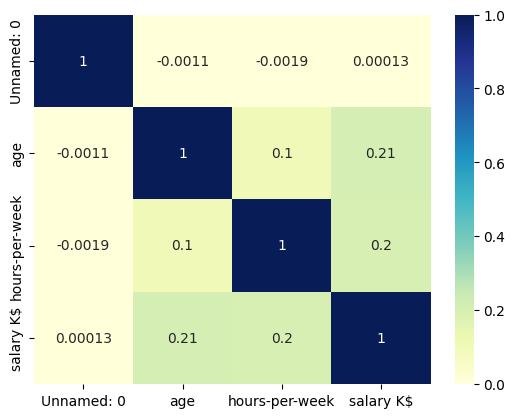

In [29]:
import seaborn as sns
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")